In [1]:
from datetime import datetime

# import community as community2 # pip install python-louvain
# import networkx as nx
# from networkx.algorithms import community
import pandas as pd
import seaborn as sns

In [2]:
# pd.options.display.max_rows = 1000
# pd.options.display.max_columns = 1000

## Loading data

In [3]:
df = pd.read_csv('data/out/checkins.csv', index_col=0)

In [4]:
df.columns

Index(['Source', 'Source Type', 'Notes', 'confidence',
       'Comprehensive Check In', 'Aikens, Vanoye', 'Alexander, James',
       'Aul, Ronnie', 'Bradley, Wilbert', 'Brooks, Jay', 'Burton, Miriam',
       'Canto, Umberto', 'Clay, Eddy', 'Destine, Jean Leon', 'Ellis, Lucille',
       'Frasier, Awilda', 'Gomez, Tommy'],
      dtype='object')

In [5]:
df.shape

(10, 17)

In [6]:
df.head()

,Source,Source Type,Notes,confidence,Comprehensive Check In,"Aikens, Vanoye","Alexander, James","Aul, Ronnie","Bradley, Wilbert","Brooks, Jay","Burton, Miriam","Canto, Umberto","Clay, Eddy","Destine, Jean Leon","Ellis, Lucille","Frasier, Awilda","Gomez, Tommy"
"Mar 14, 1947",SIU Box 9 Folder 9,correspondence,Eddy Clay injured,1,n,n,n,n,n,n,n,n,y,n,n,n,n
"Apr 07, 1947",SIU Box 10 Folder 1,administration,signed contracts for Mexico tour; Vicente sign...,2,y,y,y,y,y,n,y,n,y,y,y,n,n
"Jun 28, 1947",SIU Box 100 Folder 3,administration,expenses,1,n,y,y,y,y,n,y,n,y,y,y,n,n
"Jul 01, 1947",SIU Box 10 Folder 4,administration,performer contact list for Mexico City,4,y,y,y,y,y,n,n,y,n,y,y,n,n
"Jul 06, 1947",SIU Box 100 Folder 3,stage,performer list - no date but with July 1947 pa...,4,n,y,y,y,y,n,n,y,n,y,y,n,n


In [7]:
dunham_df = pd.read_csv('data/out/everyday_city_country.csv', index_col=0)
dunham_df.fillna('', inplace=True)
dunham_df.index = pd.to_datetime(dunham_df.index)

In [8]:
dunham_df.shape

(10, 2)

In [9]:
dunham_df.head()

,CITY,COUNTRY
1947-03-14,New York City,USA
1947-04-07,New York City,USA
1947-06-28,Mexico City,Mexico
1947-07-01,Mexico City,Mexico
1947-07-06,Mexico City,Mexico


## Pre-processing data

In [10]:
def format_name(name):
    if ',' in name and not ', ' in name:
        print('ERROR NAME')
    if ', ' in name:
        last, first = name.split(', ')
        fullname = first + ' ' + last
    else:
        fullname = name
    return fullname

In [11]:
new_columns = [format_name(c) for c in df.columns]
df.columns = new_columns

In [12]:
dunham_df2 = dunham_df

In [13]:
df2 = df

In [14]:
comprehensive_sr = df2['Comprehensive Check In']

In [15]:
N = 5
df2 = df2.iloc[:, N:]

In [16]:
df2.shape

(10, 12)

In [17]:
df2.head()

,Vanoye Aikens,James Alexander,Ronnie Aul,Wilbert Bradley,Jay Brooks,Miriam Burton,Umberto Canto,Eddy Clay,Jean Leon Destine,Lucille Ellis,Awilda Frasier,Tommy Gomez
"Mar 14, 1947",n,n,n,n,n,n,n,y,n,n,n,n
"Apr 07, 1947",y,y,y,y,n,y,n,y,y,y,n,n
"Jun 28, 1947",y,y,y,y,n,y,n,y,y,y,n,n
"Jul 01, 1947",y,y,y,y,n,n,y,n,y,y,n,n
"Jul 06, 1947",y,y,y,y,n,n,y,n,y,y,n,n


In [18]:
df2.loc[:, (df2 == 'n').all(axis=0)].head()

""
"Mar 14, 1947"
"Apr 07, 1947"
"Jun 28, 1947"
"Jul 01, 1947"
"Jul 06, 1947"


In [19]:
df2 = df2.loc[:, (df2 == 'y').any(axis=0)]

In [20]:
df2.loc[:, (df2 == 'n').all(axis=0)].head()

""
"Mar 14, 1947"
"Apr 07, 1947"
"Jun 28, 1947"
"Jul 01, 1947"
"Jul 06, 1947"


## Processing data

In [21]:
df3 = df2.copy()

In [22]:
cast = df3.columns
cast2 = [c + ' 2' for c in df3.columns]

In [23]:
for i, name in enumerate(cast2):
    yn_lst = ['n'] * len(cast2)
    yn_lst[i] = 'y'
    df3.loc[name] = yn_lst

In [24]:
cast[:5]

Index(['Vanoye Aikens', 'James Alexander', 'Ronnie Aul', 'Wilbert Bradley',
       'Jay Brooks'],
      dtype='object')

In [25]:
dates = list(df3.index.astype(str))

In [26]:
dates[:5]

['Mar 14, 1947',
 'Apr 07, 1947',
 'Jun 28, 1947',
 'Jul 01, 1947',
 'Jul 06, 1947']

In [27]:
dates[-5:]

['Eddy Clay 2',
 'Jean Leon Destine 2',
 'Lucille Ellis 2',
 'Awilda Frasier 2',
 'Tommy Gomez 2']

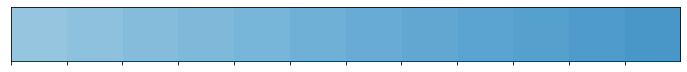

In [28]:
palette = sns.color_palette('Blues', len(cast) + 40).as_hex()[20:-20]
sns.palplot(palette)

#95c5df


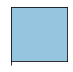

In [29]:
print(palette[0])
sns.palplot([palette[0]])

#4997c9


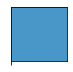

In [30]:
print(palette[-1])
sns.palplot([palette[-1]])

In [31]:
def get_first_checkin_date(name):
    sr = df2[name]
    if 'y' in sr.unique():
        r = sr[sr == 'y'].index[0]
    else:
        r = ''
    return r

def get_last_checkin_date(name):
    sr = df2[name]
    if 'y' in sr.unique():
        r = sr[sr == 'y'].index[-1]
    else:
        r = ''
    return r

In [32]:
nodes_df = pd.DataFrame(columns=['name', 'label', 'color', 'nodeType__2', 'city__2', 'country__2'])
k = 0
for name in cast:
#     nodes_df.loc[k] = [name, palette[k]]
    nodes_df.loc[k] = [
        name, name, 'green', 'cast',
        get_first_checkin_date(name),
        get_last_checkin_date(name),
    ] # use city__2 and country__2 for first and last date respectively
    k += 1
for date in dates:
    if k < sum(df2.shape): # date
        date_date = pd.to_datetime(date)
        if date_date in dunham_df2.index:
            city = dunham_df2.loc[date_date, 'CITY']
            country = dunham_df2.loc[date_date, 'COUNTRY']
        else:
            city = ''
            country = ''
        if comprehensive_sr[date] == 'y':
            nodes_df.loc[k] = [date, date, 'black', 'checkin', city, country]
        else: # comprehensive_sr[date] == 'n':
            nodes_df.loc[k] = [date, date, 'lightgrey', 'checkin', city, country]
    else: # cast
        name = date
        label = name[:-2]
        nodes_df.loc[k] = [
            name, label, 'green', 'cast',
            get_first_checkin_date(label),
            get_last_checkin_date(label),
        ] # use city__2 and country__2 for first and last date respectively
    k += 1

In [33]:
nodes_df.shape

(34, 6)

In [34]:
nodes_df.head()

,name,label,color,nodeType__2,city__2,country__2
0,Vanoye Aikens,Vanoye Aikens,green,cast,"Apr 07, 1947","Jan 04, 1948"
1,James Alexander,James Alexander,green,cast,"Apr 07, 1947","Jan 04, 1948"
2,Ronnie Aul,Ronnie Aul,green,cast,"Apr 07, 1947","Sep 01, 1947"
3,Wilbert Bradley,Wilbert Bradley,green,cast,"Apr 07, 1947","Jan 04, 1948"
4,Jay Brooks,Jay Brooks,green,cast,"Dec 29, 1947","Jan 04, 1948"


In [35]:
nodes_df.tail()

,name,label,color,nodeType__2,city__2,country__2
29,Eddy Clay 2,Eddy Clay,green,cast,"Mar 14, 1947","Jan 04, 1948"
30,Jean Leon Destine 2,Jean Leon Destine,green,cast,"Apr 07, 1947","Sep 01, 1947"
31,Lucille Ellis 2,Lucille Ellis,green,cast,"Apr 07, 1947","Jan 04, 1948"
32,Awilda Frasier 2,Awilda Frasier,green,cast,"Jan 04, 1948","Jan 04, 1948"
33,Tommy Gomez 2,Tommy Gomez,green,cast,"Dec 29, 1947","Jan 04, 1948"


In [36]:
def get_n_checkins(name):
    return df3[name].value_counts()['y']

def get_first_time(name):
    return list(df3[name]).index('y')

def get_duration(name):
    try:
        indices = [j for j, v in enumerate(df3[name]) if v == 'y']
        first_index = indices[0]
        last_index = indices[-2]
        first_date = pd.to_datetime(df3.index[first_index])
        last_date = pd.to_datetime(df3.index[last_index])
        r = (last_date - first_date).days
    except:
        r = 0
    return r

In [37]:
cast_to_sort = [(
    name,
    get_n_checkins(name),
    get_first_time(name),
    get_duration(name),
) for name in cast]

In [38]:
cast_df = pd.DataFrame(cast_to_sort, columns=['NAME', 'N_CHECKINGS', 'FIRST_TIME', 'DURATION'])

In [39]:
cast_df.head()

,NAME,N_CHECKINGS,FIRST_TIME,DURATION
0,Vanoye Aikens,10,1,272
1,James Alexander,10,1,272
2,Ronnie Aul,7,1,147
3,Wilbert Bradley,9,1,272
4,Jay Brooks,4,7,6


In [40]:
def get_index(v):
    return nodes_df[nodes_df.name == v].index[0]

### Coloring by first time

In [41]:
sorted_cast = cast_df.sort_values('FIRST_TIME', ascending=False).NAME

In [42]:
sorted_cast.head()

10    Awilda Frasier
4         Jay Brooks
11       Tommy Gomez
6      Umberto Canto
0      Vanoye Aikens
Name: NAME, dtype: object

In [43]:
%%time

links_df = pd.DataFrame(columns=['source', 'target', 'value', 'label', 'color'])
k = 0
for i, name in enumerate(sorted_cast):
    sr = df3[name]
    last_yes = None
    for j in range(sr.size):
        if sr[j] == 'y':
            new_yes = dates[j]
            if not last_yes:
                links_df.loc[k] = [get_index(name), get_index(new_yes), 1, name, palette[i]]
            else:
                links_df.loc[k] = [get_index(last_yes), get_index(new_yes), 1, name, palette[i]]
            last_yes = new_yes
            k += 1

CPU times: user 205 ms, sys: 1.87 ms, total: 206 ms
Wall time: 205 ms


In [44]:
links_df.shape

(81, 5)

In [45]:
links_df.head()

,source,target,value,label,color
0,10,21,1,Awilda Frasier,#95c5df
1,21,32,1,Awilda Frasier,#95c5df
2,4,19,1,Jay Brooks,#8dc1dd
3,19,20,1,Jay Brooks,#8dc1dd
4,20,21,1,Jay Brooks,#8dc1dd


### Saving data

In [46]:
nodes_df.to_csv('web/data/nodes_by_first_time.csv', index=False)

In [47]:
links_df.to_csv('web/data/links_by_first_time.csv', index=False)